In [44]:
import pandas as pd
import tensorflow as tf
import numpy as np
print(tf.__version__)

2.4.1


In [45]:
data = pd.read_csv(r'C:\Users\Dell\OneDrive - Hanoi University of Science and Technology\Desktop\HUST\KHDL_IT4930\dataset\data.csv',sep='\t', index_col=0)
data

,kieu_dang,hop_so,km_da_di,nhien_lieu,so_cho_ngoi,tinh_trang,xuat_xu,nam_sx,gia,dong_xe,hang
0,Sedan,Tự động,9000,Xăng,5,Đã sử dụng,Lắp ráp trong nước,2019,4.480000e+09,Sclass,Mercedes Benz
1,Sedan,Tự động,20000,Xăng,5,Đã sử dụng,Lắp ráp trong nước,2017,1.155000e+09,Cclass,Mercedes Benz
2,SUV / Cross over,Tự động,0,Xăng,5,Mới,Lắp ráp trong nước,2021,5.790000e+08,Kona,Hyundai
3,SUV / Cross over,Tự động,0,Xăng,5,Mới,Lắp ráp trong nước,2021,8.250000e+08,Tucson,Hyundai
4,Sedan,Tự động,32000,Xăng,4,Đã sử dụng,Nhập khẩu,2017,5.750000e+09,Panamera,Porsche
...,...,...,...,...,...,...,...,...,...,...,...
41143,SUV / Cross over,Số sàn,200000,Xăng,8,Đã sử dụng,Lắp ráp trong nước,2009,2.800000e+08,Zinger,Mitsubishi
41144,Sedan,Tự động,38000,Xăng,5,Đã sử dụng,Lắp ráp trong nước,2018,5.630000e+08,3,Mazda
41145,Hatchback,Tự động,70000,Xăng,5,Đã sử dụng,Lắp ráp trong nước,2009,1.850000e+08,Morning,Kia
41146,Sedan,Số sàn,2555,Xăng,5,Đã sử dụng,Nhập khẩu,1999,4.250000e+07,Matiz,Daewoo


In [46]:
train_dataset = pd.read_csv(r'C:\Users\Dell\OneDrive - Hanoi University of Science and Technology\Desktop\HUST\KHDL_IT4930\dataset\train.csv',sep='\t',index_col=0)
train_dataset

,kieu_dang,hop_so,km_da_di,nhien_lieu,so_cho_ngoi,tinh_trang,xuat_xu,nam_sx,gia,dong_xe,hang
13584,Sedan,Tự động,350000,Xăng,5,Đã sử dụng,Lắp ráp trong nước,2020,3.780000e+08,I10,Hyundai
16547,SUV / Cross over,Tự động,0,Dầu,7,Mới,Lắp ráp trong nước,2021,1.114000e+09,Sorento,Kia
24133,Van/Minivan,Số sàn,200000,Xăng,16,Đã sử dụng,Lắp ráp trong nước,2007,1.980000e+08,Hiace,Toyota
33051,Bán tải / Pickup,Số sàn,123456,Dầu,5,Đã sử dụng,Nhập khẩu,2005,1.850000e+08,Ranger,Ford
32363,Van/Minivan,Tự động,68000,Xăng,7,Đã sử dụng,Lắp ráp trong nước,2011,3.050000e+08,Carens,Kia
...,...,...,...,...,...,...,...,...,...,...,...
187,SUV / Cross over,Tự động,140000,Xăng,8,Đã sử dụng,Lắp ráp trong nước,2011,3.250000e+08,Zinger,Mitsubishi
7841,Hatchback,Tự động,60000,Xăng,5,Đã sử dụng,Lắp ráp trong nước,2019,3.230000e+08,Fadil,VinFast
22395,SUV / Cross over,Số sàn,70000,Xăng,8,Đã sử dụng,Lắp ráp trong nước,2016,4.800000e+08,Innova,Toyota
10123,SUV / Cross over,Tự động,80000,Xăng,5,Đã sử dụng,Lắp ráp trong nước,2018,8.160000e+08,CX5,Mazda


In [47]:
test_dataset = pd.read_csv(r'C:\Users\Dell\OneDrive - Hanoi University of Science and Technology\Desktop\HUST\KHDL_IT4930\dataset\test.csv',sep='\t',index_col=0)
val_dataset = pd.read_csv(r'C:\Users\Dell\OneDrive - Hanoi University of Science and Technology\Desktop\HUST\KHDL_IT4930\dataset\val.csv',sep='\t',index_col=0)

In [48]:
train_val_dataset = pd.concat([train_dataset,val_dataset],axis=0)
dataset = pd.concat([train_val_dataset,test_dataset],axis=0)

In [49]:
dataset = pd.get_dummies(dataset, columns=['tinh_trang', 'hang', 'dong_xe', 'xuat_xu', 'kieu_dang', 'nhien_lieu', 'hop_so'])
dataset

,km_da_di,so_cho_ngoi,nam_sx,gia,tinh_trang_Mới,tinh_trang_Đã sử dụng,hang_Acura,hang_Audi,hang_BMW,hang_Bentley,...,kieu_dang_Truck,kieu_dang_Van/Minivan,kieu_dang_Wagon,nhien_lieu_Dầu,nhien_lieu_Hybrid,nhien_lieu_Xăng,nhien_lieu_Điện,hop_so_Bán tự động,hop_so_Số sàn,hop_so_Tự động
13584,350000,5,2020,3.780000e+08,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
16547,0,7,2021,1.114000e+09,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
24133,200000,16,2007,1.980000e+08,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
33051,123456,5,2005,1.850000e+08,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
32363,68000,7,2011,3.050000e+08,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8837,280000,5,2008,1.100000e+08,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
19100,0,7,2021,1.140000e+09,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
18890,28000,5,2018,7.750000e+08,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
32546,123456,5,1993,7.500000e+07,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0


In [50]:
stats = dataset.describe()
stats = stats.transpose()
stats

,count,mean,std,min,25%,50%,75%,max
km_da_di,41148.0,1.471698e+05,2.497685e+06,0.0,20000.0,60000.0,110000.0,3.000000e+08
so_cho_ngoi,41148.0,5.719452e+00,2.211953e+00,2.0,5.0,5.0,7.0,4.700000e+01
nam_sx,41148.0,2.014503e+03,5.699630e+00,1980.0,2011.0,2016.0,2019.0,2.021000e+03
gia,41148.0,8.001651e+08,1.560205e+09,32000000.0,285000000.0,475000000.0,750000000.0,6.800000e+10
tinh_trang_Mới,41148.0,6.994265e-02,2.550534e-01,0.0,0.0,0.0,0.0,1.000000e+00
...,...,...,...,...,...,...,...,...
nhien_lieu_Xăng,41148.0,8.406484e-01,3.660081e-01,0.0,1.0,1.0,1.0,1.000000e+00
nhien_lieu_Điện,41148.0,1.458151e-04,1.207466e-02,0.0,0.0,0.0,0.0,1.000000e+00
hop_so_Bán tự động,41148.0,3.693983e-03,6.066652e-02,0.0,0.0,0.0,0.0,1.000000e+00
hop_so_Số sàn,41148.0,3.510013e-01,4.772891e-01,0.0,0.0,0.0,1.0,1.000000e+00


In [51]:
stats.to_csv('stats.csv',sep='\t',encoding='utf-8')
# train_dataset.to_csv('train.csv', sep='\t', encoding='utf-8')

In [52]:
from sklearn import preprocessing
norm = preprocessing.StandardScaler()

dataset[dataset.columns] = norm.fit_transform(dataset)



In [53]:
dataset

,km_da_di,so_cho_ngoi,nam_sx,gia,tinh_trang_Mới,tinh_trang_Đã sử dụng,hang_Acura,hang_Audi,hang_BMW,hang_Bentley,...,kieu_dang_Truck,kieu_dang_Van/Minivan,kieu_dang_Wagon,nhien_lieu_Dầu,nhien_lieu_Hybrid,nhien_lieu_Xăng,nhien_lieu_Điện,hop_so_Bán tự động,hop_so_Số sàn,hop_so_Tự động
13584,0.081208,-0.325260,0.964518,-0.270586,-0.274231,0.274231,-0.017777,-0.084686,-0.13486,-0.039159,...,-0.147055,-0.309876,-0.013945,-0.42996,-0.056514,0.435383,-0.012076,-0.060891,-0.735415,0.741387
16547,-0.058923,0.578929,1.139970,0.201152,3.646564,-3.646564,-0.017777,-0.084686,-0.13486,-0.039159,...,-0.147055,-0.309876,-0.013945,2.32580,-0.056514,-2.296831,-0.012076,-0.060891,-0.735415,0.741387
24133,0.021152,4.647782,-1.316360,-0.385957,-0.274231,0.274231,-0.017777,-0.084686,-0.13486,-0.039159,...,-0.147055,3.227096,-0.013945,-0.42996,-0.056514,0.435383,-0.012076,-0.060891,1.359777,-1.348822
33051,-0.009494,-0.325260,-1.667264,-0.394290,-0.274231,0.274231,-0.017777,-0.084686,-0.13486,-0.039159,...,-0.147055,-0.309876,-0.013945,2.32580,-0.056514,-2.296831,-0.012076,-0.060891,1.359777,-1.348822
32363,-0.031698,0.578929,-0.614551,-0.317376,-0.274231,0.274231,-0.017777,-0.084686,-0.13486,-0.039159,...,-0.147055,3.227096,-0.013945,-0.42996,-0.056514,0.435383,-0.012076,-0.060891,-0.735415,0.741387
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8837,0.053182,-0.325260,-1.140908,-0.442361,-0.274231,0.274231,-0.017777,-0.084686,-0.13486,-0.039159,...,-0.147055,-0.309876,-0.013945,-0.42996,-0.056514,0.435383,-0.012076,-0.060891,1.359777,-1.348822
19100,-0.058923,0.578929,1.139970,0.217817,3.646564,-3.646564,-0.017777,-0.084686,-0.13486,-0.039159,...,-0.147055,-0.309876,-0.013945,2.32580,-0.056514,-2.296831,-0.012076,-0.060891,-0.735415,0.741387
18890,-0.047713,-0.325260,0.613613,-0.016130,-0.274231,0.274231,-0.017777,-0.084686,-0.13486,-0.039159,...,-0.147055,-0.309876,-0.013945,-0.42996,-0.056514,0.435383,-0.012076,-0.060891,-0.735415,0.741387
32546,-0.009494,-0.325260,-3.772689,-0.464794,-0.274231,0.274231,-0.017777,-0.084686,-0.13486,-0.039159,...,-0.147055,-0.309876,-0.013945,-0.42996,-0.056514,0.435383,-0.012076,-0.060891,1.359777,-1.348822


In [54]:
train_dataset = dataset.loc[train_dataset.index]
val_dataset = dataset.loc[val_dataset.index]
test_dataset = dataset.loc[test_dataset.index]

In [55]:
# test_dataset.to_csv('test_dataset_encode.csv')

In [56]:
train_labels = train_dataset.pop('gia')
val_labels = val_dataset.pop('gia')
test_labels = test_dataset.pop('gia')

In [59]:
from tensorflow import keras
from tensorflow.keras import layers

In [60]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [61]:
print(len(train_dataset))

26334


In [62]:
def build_model():
    
    model = keras.Sequential([
        layers.Dense(64, activation='relu', input_dim =390),
        layers.Dense(32, activation='relu'),
        layers.Dense(1)
    ])

#   optimizer = tf.keras.optimizers.SGD(0.001, momentum=0.9)

    opt = tf.keras.optimizers.RMSprop(0.001)

    model.compile(loss='mse',
                    optimizer=opt,
                    metrics=[ 'mse'])
    return model
model = build_model()

In [63]:
EPOCHS = 100
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2)
history1 = model.fit(
  train_dataset, train_labels,
  epochs=EPOCHS,batch_size=128, verbose=2, validation_data=(val_dataset,val_labels)
  )

Epoch 1/100
206/206 - 1s - loss: 0.4373 - mse: 0.4373 - val_loss: 0.2787 - val_mse: 0.2787
Epoch 2/100
206/206 - 0s - loss: 0.1648 - mse: 0.1648 - val_loss: 0.1779 - val_mse: 0.1779
Epoch 3/100
206/206 - 0s - loss: 0.1246 - mse: 0.1246 - val_loss: 0.1502 - val_mse: 0.1502
Epoch 4/100
206/206 - 0s - loss: 0.1060 - mse: 0.1060 - val_loss: 0.1330 - val_mse: 0.1330
Epoch 5/100
206/206 - 0s - loss: 0.0880 - mse: 0.0880 - val_loss: 0.1395 - val_mse: 0.1395
Epoch 6/100
206/206 - 0s - loss: 0.0834 - mse: 0.0834 - val_loss: 0.1173 - val_mse: 0.1173
Epoch 7/100
206/206 - 0s - loss: 0.0745 - mse: 0.0745 - val_loss: 0.1283 - val_mse: 0.1283
Epoch 8/100
206/206 - 0s - loss: 0.0693 - mse: 0.0693 - val_loss: 0.1269 - val_mse: 0.1269
Epoch 9/100
206/206 - 0s - loss: 0.0699 - mse: 0.0699 - val_loss: 0.0797 - val_mse: 0.0797
Epoch 10/100
206/206 - 0s - loss: 0.0609 - mse: 0.0609 - val_loss: 0.1131 - val_mse: 0.1131
Epoch 11/100
206/206 - 0s - loss: 0.0623 - mse: 0.0623 - val_loss: 0.0721 - val_mse: 0.07

In [64]:
model.save("mymodel.h5")

In [65]:
import matplotlib.pyplot as plt

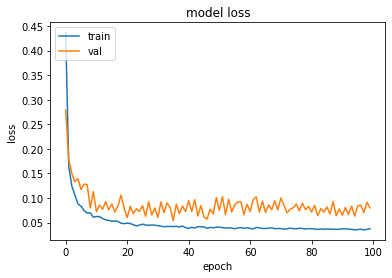

In [66]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','val'], loc='upper left')
plt.show()